Professor Emre's Research 

Net Route Data research 

Summary statistics for Optimal = 1 rows:

       Latency_ms  Bandwidth_Mbps  Security_Risk  Energy_Consumption_J  \
count   10.000000       10.000000      10.000000             10.000000   
mean    33.180976       59.931613       0.254443              4.920215   
std     12.225685       32.753869       0.148479              2.510556   
min     17.072065       15.137817       0.051957              2.152929   
25%     21.519948       28.112814       0.170992              2.840651   
50%     34.348757       63.248608       0.227359              4.564954   
75%     45.091079       83.927736       0.363068              6.128015   
max     47.922130       99.472543       0.471168              9.958554   

       Packet_Delivery_Ratio_%  End_to_End_Delay_ms  Trust_Score  Optimal  
count                10.000000            10.000000    10.000000     10.0  
mean                 90.616502            28.559157     0.888340      1.0  
std                   6.441616            13.417726     0.07417

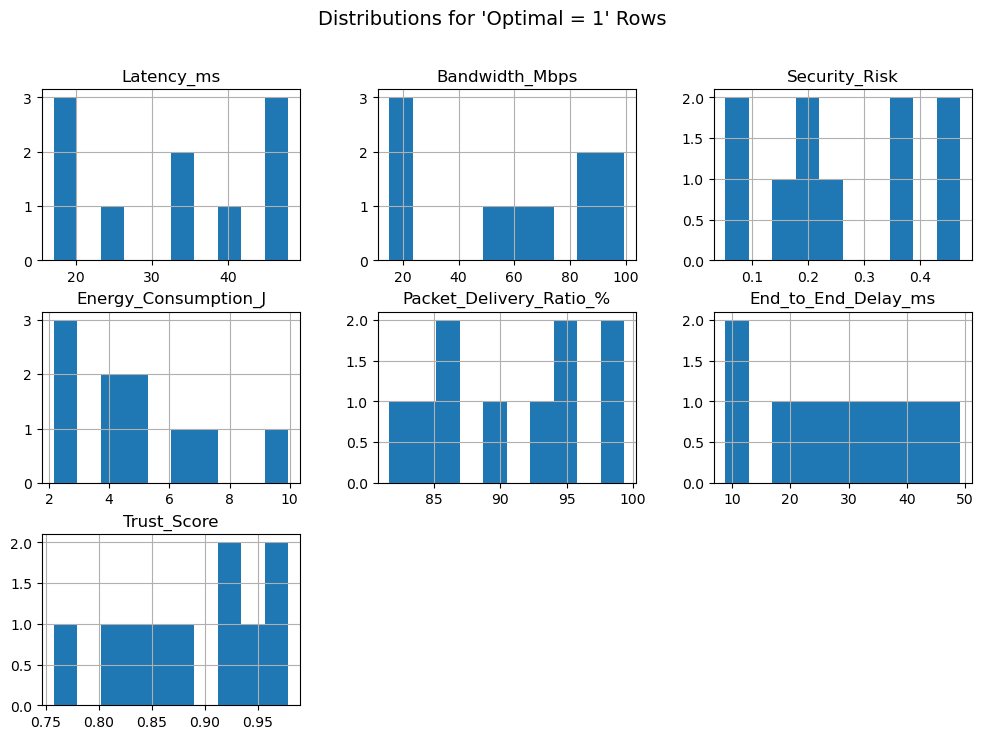

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("NetRouteData.csv")

# Keep only relevant columns ---
relevant_cols = [
    "Latency_ms", "Bandwidth_Mbps", "Security_Risk", "Energy_Consumption_J",
    "Packet_Delivery_Ratio_%", "End_to_End_Delay_ms", "Trust_Score", "Algorithm_Used", "Optimal"
]
filtered_data = data[relevant_cols]

# Select rows where Optimal = 1 ---
optimal_ones = filtered_data[filtered_data["Optimal"] == 1]

# Show summary statistics ---
print("Summary statistics for Optimal = 1 rows:\n")
print(optimal_ones.describe())

#Plot histograms for numeric columns ---
numeric_cols = optimal_ones.select_dtypes(include=["float64", "int64"]).columns.drop("Optimal")
optimal_ones[numeric_cols].hist(bins=10, figsize=(12, 8))
plt.suptitle("Distributions for 'Optimal = 1' Rows", fontsize=14)
plt.show()


Simulating 480 More “Optimal = 1” Samples

In [2]:
import numpy as np
import pandas as pd

# Identify numeric columns
numeric_cols = optimal_ones.select_dtypes(include=["float64", "int64"]).columns.drop("Optimal")

# Try to prepare empty DataFrame to store simulated samples
simulated_data = pd.DataFrame()

# Generate 480 samples for each numeric column
for col in numeric_cols:
    mean = optimal_ones[col].mean()
    std = optimal_ones[col].std()
    min_val = optimal_ones[col].min()
    max_val = optimal_ones[col].max()

    # Generate normally distributed random numbers around mean ± std
    simulated_col = np.random.normal(loc=mean, scale=std, size=480)

    # Clip to stay within observed min–max range
    simulated_col = np.clip(simulated_col, min_val, max_val)

    simulated_data[col] = simulated_col

# Handle categorical column “Algorithm_Used”
algorithm_mode = optimal_ones["Algorithm_Used"].mode()[0]
simulated_data["Algorithm_Used"] = [algorithm_mode] * 480

# Add Optimal column = 1
simulated_data["Optimal"] = 1

# Optional: preview simulated data
print(simulated_data.head())

# Combine with original 10 samples then Save
augmented_optimal = pd.concat([optimal_ones, simulated_data], ignore_index=True)

augmented_optimal.to_csv("Simulated_Optimal_Data.csv", index=False)
print("✅ Simulated 480 'Optimal = 1' samples saved to Simulated_Optimal_Data.csv")


   Latency_ms  Bandwidth_Mbps  Security_Risk  Energy_Consumption_J  \
0   17.072065       24.003303       0.165565              2.152929   
1   31.991287       31.176941       0.342986              4.574254   
2   30.233405       71.529560       0.244257              2.152929   
3   25.505825       36.948246       0.232418              5.398907   
4   37.452927       20.781769       0.118919              4.689354   

   Packet_Delivery_Ratio_%  End_to_End_Delay_ms  Trust_Score Algorithm_Used  \
0                93.654916            47.182559     0.974220     MCRO-RHGSO   
1                90.337536             8.829657     0.852741     MCRO-RHGSO   
2                94.949730             8.829657     0.869037     MCRO-RHGSO   
3                91.731924            31.266118     0.922587     MCRO-RHGSO   
4                81.622984            35.526590     0.868973     MCRO-RHGSO   

   Optimal  
0        1  
1        1  
2        1  
3        1  
4        1  
✅ Simulated 480 'Optimal =

Task 2. 

Classification with using SVM and Logistic Regression

In [6]:
# ================================
# Task 2 - Classification Analysis
# Professor Emre Research Project
# ================================

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

# Load Dataset
df = pd.read_csv("NetRouteData.csv")
print("Data shape:", df.shape)
print(df.head())

Data shape: (500, 16)
  Route_ID  Source_Node  Destination_Node  Latency_ms  Bandwidth_Mbps  \
0       R1            3                30   46.847049       15.137817   
1       R2            9                38   34.664970       97.292084   
2       R3           14                22   40.081950       83.605079   
3       R4            9                24   26.251781       68.272724   
4       R5            9                21   47.922130       84.035289   

   Security_Risk  Energy_Consumption_J  Packet_Delivery_Ratio_%  \
0       0.368310              2.220294                99.336910   
1       0.058551              6.429692                85.306523   
2       0.186101              4.206141                88.753227   
3       0.347343              2.152929                94.653981   
4       0.051957              5.222986                92.970096   

   End_to_End_Delay_ms  Trust_Score Algorithm_Used  Optimal  Unnamed: 12  \
0            21.219207     0.978355     MCRO-RHGSO        1 

In [8]:

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Define Features and Target

X = df.drop('Optimal', axis=1)
y = df['Optimal']


Missing values:
 Route_ID                     0
Source_Node                  0
Destination_Node             0
Latency_ms                   0
Bandwidth_Mbps               0
Security_Risk                0
Energy_Consumption_J         0
Packet_Delivery_Ratio_%      0
End_to_End_Delay_ms          0
Trust_Score                  0
Algorithm_Used               0
Optimal                      0
Unnamed: 12                500
Unnamed: 13                490
Unnamed: 14                500
Unnamed: 15                499
dtype: int64


In [9]:
# Handle Class Imbalance — Balancing Dataset
# Check class distribution
print("\nOriginal class distribution:\n", y.value_counts())


Original class distribution:
 Optimal
0    490
1     10
Name: count, dtype: int64


In [1]:

# Encode target if not numeric
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("\nTarget classes encoded as:", dict(zip(le.classes_, le.transform(le.classes_))))

# Convert non-numeric features automatically
X = pd.get_dummies(X, drop_first=True)

NameError: name 'y' is not defined

In [26]:
# Handle Class Imbalance
df_balanced = pd.concat([X, pd.Series(y, name='target')], axis=1)
majority = df_balanced[df_balanced['target'] == df_balanced['target'].value_counts().idxmax()]
minority = df_balanced[df_balanced['target'] != df_balanced['target'].value_counts().idxmax()]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

balanced_df = pd.concat([majority, minority_upsampled])
print("\nBalanced class distribution:\n", balanced_df['target'].value_counts())

# Split Data
X_bal = balanced_df.drop('target', axis=1)
y_bal = balanced_df['target']

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)



Balanced class distribution:
 target
0    490
1    490
Name: count, dtype: int64


In [32]:
# Handle Missing Values
df = df.fillna(df.mean(numeric_only=True))


In [ ]:
# Load Dataset
df = pd.read_csv("NetRouteData.csv")

print("Data shape:", df.shape)
print(df.head())

# Handle Missing Values
df = df.fillna(df.mean(numeric_only=True))

# Define Features and Target
X = df.drop('Optimal', axis=1)
y = df['Optimal']


Data shape: (500, 16)
  Route_ID  Source_Node  Destination_Node  Latency_ms  Bandwidth_Mbps  \
0       R1            3                30   46.847049       15.137817   
1       R2            9                38   34.664970       97.292084   
2       R3           14                22   40.081950       83.605079   
3       R4            9                24   26.251781       68.272724   
4       R5            9                21   47.922130       84.035289   

   Security_Risk  Energy_Consumption_J  Packet_Delivery_Ratio_%  \
0       0.368310              2.220294                99.336910   
1       0.058551              6.429692                85.306523   
2       0.186101              4.206141                88.753227   
3       0.347343              2.152929                94.653981   
4       0.051957              5.222986                92.970096   

   End_to_End_Delay_ms  Trust_Score Algorithm_Used  Optimal  Unnamed: 12  \
0            21.219207     0.978355     MCRO-RHGSO        1 

In [30]:
# Drop Missing rows

df = df.dropna()


In [34]:

# Combine features and labels
df_balanced = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority = df_balanced[df_balanced['Optimal'] == df_balanced['Optimal'].value_counts().idxmax()]
minority = df_balanced[df_balanced['Optimal'] != df_balanced['Optimal'].value_counts().idxmax()]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,        # sample with replacement
                              n_samples=len(majority), # to match majority class
                              random_state=42)


# Combine back
balanced_df = pd.concat([majority, minority_upsampled])
print("\nBalanced class distribution:\n", balanced_df['Optimal'].value_counts())

# Split Balanced Data
X_bal = balanced_df.drop('Optimal', axis=1)
y_bal = balanced_df['Optimal']

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)



Balanced class distribution:
 Optimal
0    490
1    490
Name: count, dtype: int64


In [13]:
X_train.dtypes


Route_ID                    object
Source_Node                  int64
Destination_Node             int64
Latency_ms                 float64
Bandwidth_Mbps             float64
Security_Risk              float64
Energy_Consumption_J       float64
Packet_Delivery_Ratio_%    float64
End_to_End_Delay_ms        float64
Trust_Score                float64
Algorithm_Used              object
Unnamed: 12                float64
Unnamed: 13                float64
Unnamed: 14                float64
Unnamed: 15                float64
dtype: object

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [18]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)


<class 'pandas.core.frame.DataFrame'> (784, 416)
<class 'pandas.core.series.Series'> (784,)


In [23]:
# Train Models
## Logistic Regression

log_reg = LogisticRegression(max_iter=1000)


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)



In [ ]:
## SVM Classifier
svm_clf = SVC(kernel='rbf')   # try 'linear', 'poly', 'rbf'
## >>>>>. svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:


# Train Models
## Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

## SVM Classifier
svm_clf = SVC(kernel='rbf')   # try 'linear', 'poly', 'rbf'
####. I have a problem here >> svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluate Both Models
print("\n=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print("\n=== SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

*** Another Thing

In [38]:
# ============================================
# Task 2 - Classification (Extended Version)
# Professor Emre Research Project
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------
# 1. Load Dataset
# ------------------------
df = pd.read_csv("NetRouteData.csv")
print("Data shape:", df.shape)
print(df.head())

# Handle Missing Values
df = df.fillna(df.mean(numeric_only=True))

# ------------------------
# 2. Define Features & Target
# ------------------------
target_col = 'Optimal'  # adjust if needed
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode target labels if not numeric
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("\nTarget classes encoded as:", dict(zip(le.classes_, le.transform(le.classes_))))

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# ------------------------
# 3. Balance Dataset
# ------------------------
df_balanced = pd.concat([X, pd.Series(y, name='target')], axis=1)
majority = df_balanced[df_balanced['target'] == df_balanced['target'].value_counts().idxmax()]
minority = df_balanced[df_balanced['target'] != df_balanced['target'].value_counts().idxmax()]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

balanced_df = pd.concat([majority, minority_upsampled])

# Split Data
X_bal = balanced_df.drop('target', axis=1)
y_bal = balanced_df['target']

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 4. Train Models
# ------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    if "SVM" in name or "Logistic" in name:
        model.fit(X_train, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # trees don't need scaling
        preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    
    print(f"\n=== {name} Performance ===")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, preds))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------
# 5. Compare Model Accuracies
# ------------------------
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


Data shape: (500, 16)
  Route_ID  Source_Node  Destination_Node  Latency_ms  Bandwidth_Mbps  \
0       R1            3                30   46.847049       15.137817   
1       R2            9                38   34.664970       97.292084   
2       R3           14                22   40.081950       83.605079   
3       R4            9                24   26.251781       68.272724   
4       R5            9                21   47.922130       84.035289   

   Security_Risk  Energy_Consumption_J  Packet_Delivery_Ratio_%  \
0       0.368310              2.220294                99.336910   
1       0.058551              6.429692                85.306523   
2       0.186101              4.206141                88.753227   
3       0.347343              2.152929                94.653981   
4       0.051957              5.222986                92.970096   

   End_to_End_Delay_ms  Trust_Score Algorithm_Used  Optimal  Unnamed: 12  \
0            21.219207     0.978355     MCRO-RHGSO        1 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values